In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/campusx-official/linear-regression-assumptions/refs/heads/main/data.csv')

In [4]:
data.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [9]:
X=data.iloc[:,0:3]
y=data.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9501371735340495

# residual

In [49]:
residual=y_test-y_pred

# Assumption of linearRegression

# 1. Linear Relationship
The relationship between the independent and dependent variables is linear.

Text(0.5, 1.0, 'Feature3')

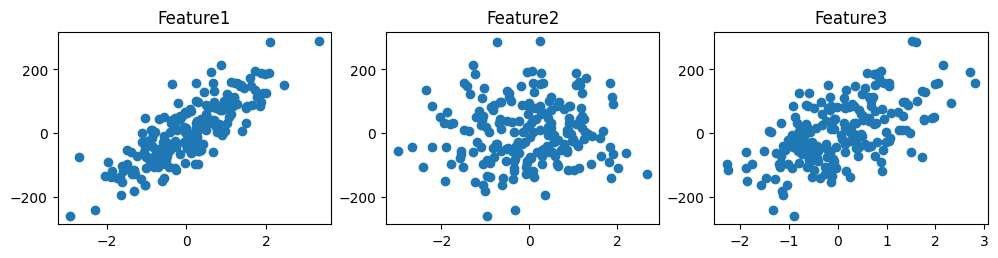

In [36]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(data['feature1'], data['target'])
ax1.set_title("Feature1")
ax2.scatter(data['feature2'], data['target'])
ax2.set_title("Feature2")
ax3.scatter(data['feature3'], data['target'])
ax3.set_title("Feature3")

# 2. Lack of Multicollinearity
 The independent variables are not highly correlated with each other.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))


In [38]:
pd.DataFrame({'vif': vif}, index=data.columns[0:3]).T

,feature1,feature2,feature3
vif,1.007179,1.016725,1.019546


In [39]:
data.iloc[:,0:3].corr()

,feature1,feature2,feature3
feature1,1.000000,-0.001055,0.049286
feature2,-0.001055,1.000000,0.060387
feature3,0.049286,0.060387,1.000000


<AxesSubplot: >

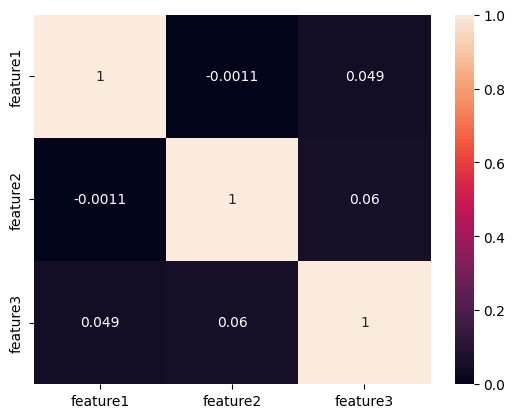

In [40]:
import seaborn as sns
sns.heatmap(data.iloc[:,0:3].corr(),annot=True)

# 3. Multivariate Normality – Normal Distribution
Multivariate normality is a key assumption for linear regression models when making statistical inferences. Specifically, it means that the residuals (the differences between observed and predicted values) should follow a normal distribution when considering multiple predictors together. This assumption ensures that hypothesis tests, confidence intervals, and p-values are valid.

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


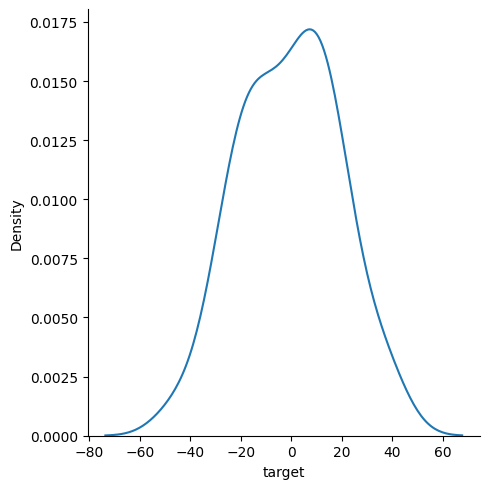

In [41]:
sns.displot(residual,kind='kde')

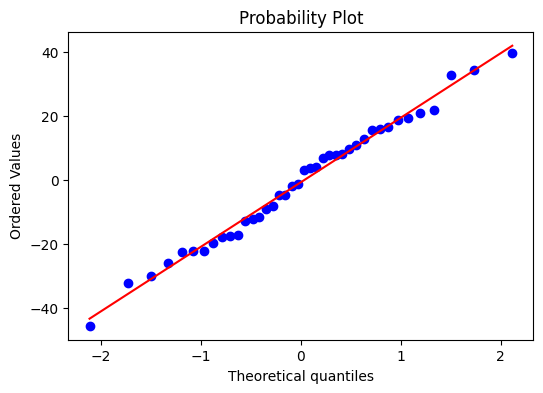

In [42]:
import scipy as sp
fig,ax=plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.show()

# 4. . Homoscedasticity of Residuals in Linear Regression
Homoscedasticity is one of the key assumptions of linear regression, which asserts that the residuals (the differences between observed and predicted values) should have a constant variance across all levels of the independent variable(s). <b>In simpler terms, it means that the spread of the errors should be relatively uniform, regardless of the value of the predictor.<b>
    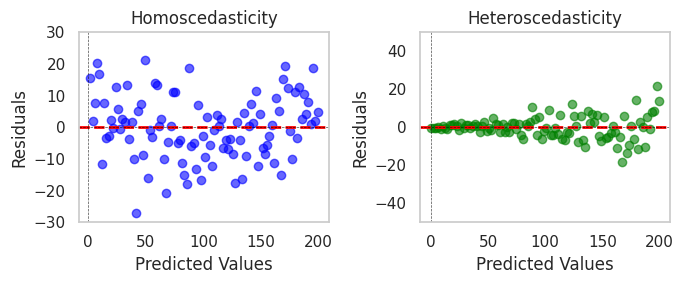

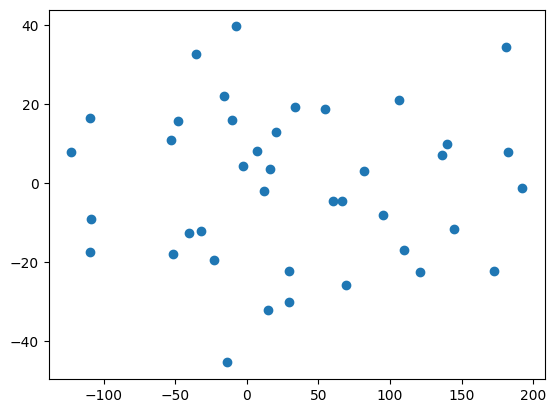

In [43]:
plt.scatter(y_pred,residual)

# 5.Autocorrelation of Residuals or Independence of Errors
Independence of errors is another critical assumption for linear regression models. It ensures that the residuals (the differences between the observed and predicted values) are not correlated with one another. This means that the error associated with one observation should not influence the error of any other observation. When errors are correlated, it can indicate that some underlying pattern or trend in the data has been overlooked by the model.

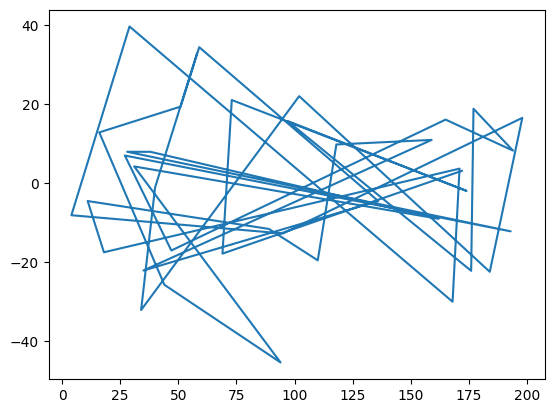

In [50]:
plt.plot(residual)

# 6. Absence of Endogeneity
No endogeneity is an important assumption in the context of multiple linear regression. The assumption of no endogeneity states that the independent variables in the regression model should not be correlated with the error term. If this assumption is violated, it leads to biased and inconsistent estimates of the regression coefficients.